# DDO4MLA Practice 8

# Artificial Neural Networks — Perceptron

# Introduction

Let us consider a simple problem of binary classification on some simple data. In such problems, a dataset has several features (input variables or predictors) and one label (boolean output: 0 or 1). That is the model must classify each sample of data (observation) as an instance of one or another class.

For instance, one can imagine a dataset of pumpkins and melons. Each sample of such a dataset can have two features, e.g. color and size, and one label having one of two values: "pumpkin" (encoded as 0) or "melon" (encoded as 1).

We first consider linearly separable data. Such data describe two sets of objects and have the property of these sets being separable by a hyperplane in n-dimensional vector space. The dimensionality of this vector space depends on the number of features, i.e. for a simple case of two features the data will be separated by a line. Below is a function that generates linearly separable data for **m** features.

In [1]:
from sklearn import datasets

def gen_lin_sep_data(l, m, n, cy=12):
  """
  Generates a dataset of linearly separable labeled data for classification
  Arguments:
      l: a number of classes (label)
      m: a number of features (inputs)
      n: a number of observations (samples)
      cy: a y-coordinate of the center box
  Returns:
      A tuple containing the matrix X and the vector y
  """
  return datasets.make_blobs(
      centers=l, n_samples=n, n_features=m, center_box=(0, cy), random_state=1)

In order to visualize a dataset generated by the function above the following function is introduced as well:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_data(X, y, lower=None, upper=None, **kwargs):
  """
  Makes pairplots for all features in a dataset
  Arguments:
      X: a matrix of features (inputs)
      y: a vector of observations (labels)
      lower: a function applied to the lower diagonal subplot
      upper: a function applied to the upper diagonal subplot
  """
  # Generate a Pandas DataFrame
  df = pd.DataFrame(dict(
      [('x' + str(i + 1), X[:, i]) for i in range(0, X.shape[1])] +
      [('y', y)]))
  
  # Make pairplots for all features in a DataFrame
  sns.set(style='ticks')
  graph = sns.pairplot(df, hue='y')

  # Plot on the lower diagonal subplot
  if lower is not None:
    graph.map_lower(lower, w=kwargs['w'])

  # Plot on the upper diagonal subplot
  if upper is not None:
    graph.map_upper(upper, w=kwargs['w'])

  # Plot the graph
  plt.show()

Let us test how the previously defined functions work. Use the first function to generate a dataset with 2 features, 2 classes, and 1000 labels, and visualize it using the second function.

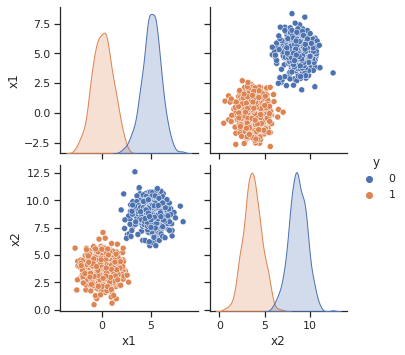

In [3]:
import random

# Ensure reproducibility
random.seed(42)

# Generate and visualize a dataset
X, y = gen_lin_sep_data(2, 2, 1000)
plot_data(X, y)

As it can be seen, there are two linearly separable sets of points in all projections.

In machine learning, a dataset is usually split into at least two parts: a training set and a test set. The training set is used to train a model, and the test set — to justify its performance, e.g., concerning the overfitting or generalization capability. The code below splits the generated dataset where the training set gets 80% and the test set gets 20% of the overall data.

In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset into the training and the test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)

Scaling data in a dataset is another common practice in machine learning. The reasons to do scaling include the potential to improve the convergence of gradient-based algorithms and the numerical stability of a given machine learning model. It is worth mentioning that scaling of data should happen after splitting: otherwise, the information about the test set (e.g., distribution parameters) will leak into the training set so that the model will show better results on the test set, rather than on a real one. The scaling of data in the code below uses normalization.

In [5]:
from sklearn.preprocessing import minmax_scale

# Normalize the training and the test sets separately
X_train = minmax_scale(X_train)
X_test = minmax_scale(X_test)

Let us visualize the training set after normalization to verify if its linear separability persists.

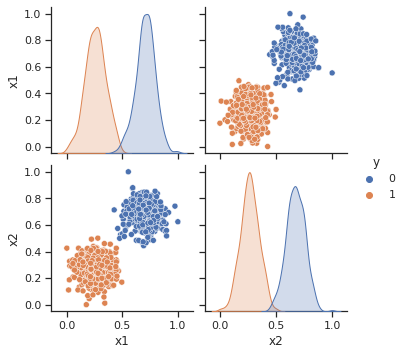

In [6]:
# Visualize the training set after normalization
plot_data(X_train, y_train)

# Exercise 1

To classify linearly separable data with two classes, we can use the perceptron, which is modeled via the following function:

$$ \hat{y}(x,w,b)=\begin{cases}1,\space w\cdot x+b>0\\ 0,\space\text{otherwise}\end{cases}$$

where $\hat{y}(x,w,b)$ is the activation function, $x$ is the vector of inputs, $w$ is the vector of weights, $b$ is a bias, and $w\cdot x$ is an dot/scalar product of $w$ and $x$.

For simplicity bias is usually put as the first element of the weights vector. In this case, the first element of the input vector $x$ for any sample must be set to one. Therefore, the function $\hat{y}(x,w,b)$ is as follows:

$$\hat{y}(x,w,b)=\begin{cases}1,\space w\cdot x>0\\0,\space\text{otherwise}\end{cases}$$

where $x=\{1,x_1,...,x_m\}$, and $w=\{b,w_1,...,w_m\}$.

The structure of the perceptron with three input variables is depicted below. Each input is multiplied by its corresponding weight, and the results are added up, which is equivalent to a dot product. The unit step function (also known as the Heaviside step function) implements the piecewise part of $\hat{y}(x,w,b)$.

![](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/74412a14-7782-4164-91e7-1ffd8019c98c/05553473-3c14-4152-b09e-22d00ee3257b/images/screenshot.jpg)

#### Task 1.1

First, a function that prepends a matrix of samples with a column of ones must be created. Complete the code below to concatenate a column-vector of ones and the matrix of samples.

In [7]:
import numpy as np

def add_ones(X):
  """
  Prepends a matrix X with a column of ones
  Arguments:
      X: a matrix of samples
  Returns:
      The matrix X prepended with a column of ones
  """
  # ToDo: Concatenate a column of ones and the matrix X
  return np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

Use the function above to add a column of ones to the training and the test sets, and print the first sample for both of them. The output should be:

```
[1.         0.57537421 0.68033653]

[1.         0.27504378 0.23386213]
```



In [8]:
# Add a columns of ones to the training and the test sets
X_train = add_ones(X_train)
X_test = add_ones(X_test)

# Print the first sample for both sets
print(X_train[0, :])
print(X_test[0, :])

[1.         0.57537421 0.68033653]
[1.         0.27504378 0.23386213]


#### Task 1.2

Let us create a new class **Perceptron**, an instance of which can handle binary classification. Complete the method **forward_pass(input)** to compute the activation function $\hat{y}(x,w,b)$.


In [9]:
class Perceptron:
  """
  Class representing the perceptron
  """

  def __init__(self, w):
    """
    Initializes an instance of the class
    Arguments:
        w: a column-vector containing a bias and weights
    Returns:
        An instance of the class
    """
    self.w = w

  def forward_pass(self, input):
    """
    Computes the perceptron activation function for each sample
    Arguments:
        input: a matrix with each row containing a sample
    Returns:
        A column-vector of the activation function values
    """
    # ToDo: Compute the activation function for each sample
    return input.dot(self.w) > 0


Compute the forward pass twice for the two following samples (not from the previously generated dataset) using the perceptron with unit weights. The outputs should be `True` for the first sample and `False` for the second one.

In [10]:
def create_perceptron(n):
  """
  Creates an instance of the class Perceptron with unit weights
  Arguments:
      n: a number of weights (including bias)
  Returns:
      An instance of the class Perceptron with unit weights
  """
  return Perceptron(np.ones(n))

# Instantiate the class Perceptron with 2 weights and 1 bias
perceptron = create_perceptron(3)

# Create two samples
sample_1 = np.array([1, 0,  1.01])
sample_2 = np.array([1, 0, -1.01])

# Compute a forward pass for both samples
print(perceptron.forward_pass(sample_1))
print(perceptron.forward_pass(sample_2))

True
False


Evaluate prediction accuracy of the perceptron. Compute the number of matches between predictions and true values, and divide it by the number of samples in the training set.

In [11]:
def accuracy(perceptron, X, y):
  """
  Computes prediction accuracy of the perceptron on a given dataset
  Arguments:
      perceptron: an instance of the class Perceptron
      X: a matrix of samples
      y: a vector of outputs
  Returns:
      Prediction accuracy of the perceptron
  """
  # Compute the number of mathces between prediction and true values
  matches = perceptron.forward_pass(X) == y

  # Return the percentage
  return np.count_nonzero(matches) / matches.size * 100

# Compute prediction accuracy of the perceptron on the training set
accuracy(perceptron, X_train, y_train)

50.5

As it can be seen, the resulting perceptron is not able to correctly classify the data. The accuracy is around 50%, which corresponds to a trivial model assigning the same class to all samples. The unit weights initially used in the perceptron need to be properly adjusted via some learning algorithm.

#### Task 1.3

The perceptron can be trained using the iterative learning algorithm specifically designed for it. The algorithm is rather straightforward and is as follows:


1. Initialize the epoch counter $i\leftarrow 1$, and the iteration counter $j\leftarrow 1$;
2. Take one sample $x_j$ of the training set (i.e., **X_train[:, j]**) and pass it into **forward_pass(input)** to get the prediction $\hat{y}_j$;
3. Compute the difference $\Delta y^{(j)}=y^{(j)}-\hat{y}^{(j)}$ between the prediction $\hat{y}^{(j)}$ and the real output $y^{(j)}$ (i.e., **y_train**);
4. Multiply $\Delta y^{(j)}$ by $x^{(j)}$ to get the vector of weights corrections $\Delta w^{(j)}=\Delta y^{(j)} x^{(j)}$. If prediction $\hat{y}^{(j)}$ for the i-th sample $x^{(j)}$ made right, then $\Delta y^{(j)}=0$ and the weights corrections vector will also be 0, i.e. $\Delta w^{(j)}=0$, but if prediciton made wrong, then $\Delta y^{(j)}=1$, and the weights will be modified corresponding to $x^{(j)}$;
5. Multiply $\Delta w^{(j)}$ by the learning rate $\alpha$ to scale the impact of weights correction. (Here, we can set $\alpha$ to $1$);
6. Correct the weights $w^{(j+1)}=w^{(j)}+\Delta w^{(j)}$;
7. Update the iteration counter $j\leftarrow j+1$. Repeat the process starting from (2) if there are samples left to process, i.e., $j\leq n$. Otherwise, proceed to (8);
8. Update the epoch counter $i\leftarrow i+1$. Stop the algorithm if the perceptron does not make any classification errors, or the epoch counter has reached its limit, i.e., $i=\text{epoch_lim}$. Otherwise, reset the iteration counter $i\leftarrow 1$, and repeat the process starting from (2).




We divide this algorithm into two methods of the **Perceptron** class:


*   **train_once(x, y, learning_rate)** — corresponds to the steps 2-6 of the algorithm;
*   **train_until_convergence(X, y, learning_rate, epoch_lim)** — corresponds to the steps 6-7 of the algorithm.


To clarify the terminology: iteration is a processing of a single sample, and epoch is one complete pass of the training dataset through the algorithm (in other words, $n$ iterations, where $n$ is the number of samples in the training set). The method **train_until_convergence(X, y, learning_rate, epoch_lim)** effectively represents two nested loops where the outer one corresponds to epochs, and the inner one corresponds to iterations in an epoch.

Copy and paste your code for **forward_pass(input)**, and complete the code of the method **train_once(x, y, learning_rate)** in the cell below.

In [12]:
class Perceptron:
  """
  Class representing the perceptron
  """

  def __init__(self, w):
    """
    Initializes an instance of the class
    Arguments:
        w: a column-vector containing a bias and weights
    Returns:
        An instance of the class
    """
    self.w = w

  def forward_pass(self, input):
    """
    Computes the perceptron activation function for each sample in input
    Arguments:
        input: a matrix with each row containing a sample
    Returns:
        A column-vector of the activation function values
    """
    # ToDo: Compute the activation function for each sample
    return input.dot(self.w) > 0
    
  def train_once(self, x, y, learning_rate):
    """
    Performs a single interation of the learning algorithm
    Arguments:
        input: a matrix with each row containing a sample
    Returns:
        The difference between the prediction and the real output
    """
    # ToDo:
    # 1) Update the weights self.w using the algorithm above (steps 2-6)
    # 2) Store the difference between the prediction and the real output
    #    in the variable delta_y
    delta_y = y - self.forward_pass(x)
    delta_w = delta_y * x
    self.w += learning_rate * delta_w

    # Return the difference between the prediction and the real output
    return delta_y
    
  def train_until_convergence(self, X, y, learning_rate=1.0, epoch_lim=1e4):
    """
    Trains the perceptron until convergence
    Arguments:
        X: a matrix of samples
        y: a vector of outputs
        learning_rate: a learning rate (alpha)
    """
    # Initialize the epoch counter and the error counter
    i = 0
    errors = 1

    # Run epochs until convergence (no errors, or reaching the epochs limit)
    while errors > 0 and i < epoch_lim:
        # Initialize the error counter for the epoch 
        errors = 0

        # Train the model on each sample and count errors
        for sample, output in zip(X, y):                
            error = abs(self.train_once(sample, output, learning_rate))
            errors += int(error)

        # Increment the epoch counter
        i += 1
    
    # Print the summary
    if i == epoch_lim:
      print('Maximum number of epochs is reached')
    else:
      print('Number of epochs:', i)

Run the following code to train the perceptron on the previously created dataset. The output should be:

```
Number of epochs: 2

w = [ 1.         -1.38491392 -0.76849383]
```



In [13]:
# Create and train the perceptron
perceptron = create_perceptron(3)
perceptron.train_until_convergence(X_train,  y_train)

# Print resulting accuracy
print(f'w = {perceptron.w}')

Number of epochs: 2
w = [ 1.         -1.38491392 -0.76849383]


Run the code below to test the preceptron on the first 5 samples of the test set. 

In [16]:
for i in range(5):
  perceptron_prediction = int(perceptron.forward_pass(X_test[i]))
  print(f'perceptron_prediction = {perceptron_prediction};\tlabel = {y_test[i]}')

perceptron_prediction = 1;	label = 1
perceptron_prediction = 0;	label = 0
perceptron_prediction = 0;	label = 0
perceptron_prediction = 1;	label = 1
perceptron_prediction = 1;	label = 1


Run the code below to determine accuracy of the perceptron. It should be $100.0$.

In [17]:
accuracy(perceptron, X_test, y_test)

100.0

Accuracy of 100% means the perceptron successfully classifies the test set and probably will perform well on real data.

Let us take a look at the perceptron decision boundary. The decision boundary can be obtained by equating $w\cdot x$ to zero since this value is used in the inequality to discriminate between two classes:

$$w\cdot x=b+w_1x_1+w_2x_2=0.$$

Using the above expression, $x_1$ and $x_2$ can be expressed as follows:

$$x_2=-\frac{w_1}{w_2}x_1-\frac{b}{w_2},$$

$$x_1=-\frac{w_2}{w_1}x_2-\frac{b}{w_1}.$$

The first and the second expressions represent the decision boundary for the lower and the upper diagonal subplots of **plot_data**, respectively. The functions in the cell below are used to draw the decision boundary.

In [18]:
def plot_decision_boundary_lower(xdata, ydata, **kwargs):
  """
  Plots the decision boundary on the lower diagonal subplot
  Arguments:
      xdata: x-coordinates of the existing points
      ydata: y-coordinates of the existing points
  """
  # Prepare values of the first feature and extract weights
  x1 = np.linspace(xdata.min(), xdata.max(), 2)
  w = kwargs['w']

  # Compute values of the second feature
  x2 = -w[1] / w[2] * x1 - w[0] / w[2]

  # Plot the decision boundary
  plt.gca().plot(x1, x2, 'k-')

def plot_decision_boundary_upper(xdata, ydata, **kwargs):
  """
  Plots the decision boundary on the upper diagonal subplot
  Arguments:
      xdata: x-coordinates of the existing points
      ydata: y-coordinates of the existing points
  """
  # Prepare values of the first feature and extract weights
  x2 = np.linspace(xdata.min(), xdata.max(), 2)
  w = kwargs['w']

  # Compute values of the second feature
  x1 = -w[2] / w[1] * x2 - w[0] / w[1]

  # Plot the decision boundary
  plt.gca().plot(x2, x1, 'k-')

Finally, use the function **plot_data(X, y, lower, upper)** and the function above to visualize the dataset including the decision boundary.

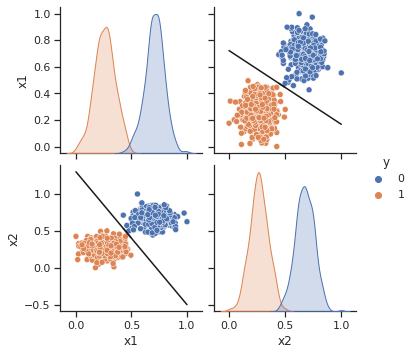

In [19]:
# Visualize the dataset including the decision boundary
plot_data(
    X_train[:, 1:], y_train, plot_decision_boundary_lower,
    plot_decision_boundary_upper, w=perceptron.w)

Now let us see how the perceptron works on nonlinearly separable data. The function below creates a nonlinearly separable dataset.

In [20]:
def gen_non_lin_sep_data(n):
  """
  Generates a dataset of two nonlinearly separable sets for classification
  Arguments:
      n: a number of observations (samples)
  Returns:
      A tuple containing the matrix X and the vector y
  """
  return datasets.make_moons(n_samples=n, noise=0.1, random_state=2) 

Run the cell below to generate and plot the nonlinearly separable dataset.

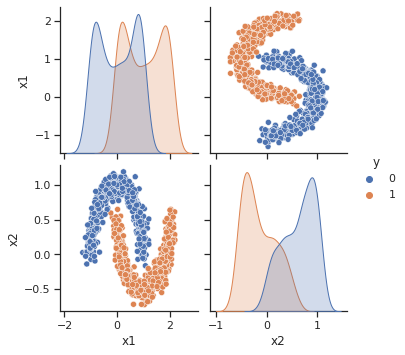

In [21]:
# Generate and visualize the nonlinearly separable dataset
X_n, y_n = gen_non_lin_sep_data(1000)
plot_data(X_n, y_n)

Split the dataset and preprocess it by running the following code.

In [22]:
# Split the dataset into the training and the test sets
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(
    X_n, y_n, test_size=0.2, shuffle=False)

# Normalize the training and the test sets
X_n_train = minmax_scale(X_n_train)
X_n_test = minmax_scale(X_n_test)

# Prepend the training and the test sets with a column of ones
X_n_train = add_ones(X_n_train)
X_n_test = add_ones(X_n_test)

Train the perceptron on nonlinearly separable data and check the resulting accuracy in the cell below.

In [23]:
# Create and train the perceptron
perceptron = create_perceptron(3)
perceptron.train_until_convergence(X_n_train, y_n_train, epoch_lim=100)

# Print accuracy
acc = accuracy(perceptron, X_n_test, y_n_test)
print(f'Accuracy: {acc}')

Maximum number of epochs is reached
Accuracy: 85.0


The perceptron has failed to converge in 100 epochs, but its accuracy is still high. Let us take a look at the decision boundary again. 

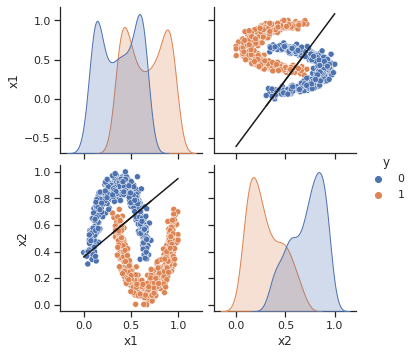

In [24]:
# Visualize the dataset including the decision boundary
plot_data(
    X_n_train[:, 1:], y_n_train, plot_decision_boundary_lower,
    plot_decision_boundary_upper, w=perceptron.w)

Obviously, it is not possible to classify nonlinearly separable data correctly with a straight line, but accuracy of around 80% can still be achieved.